In [56]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## define a single L shape marker

In [57]:
def LShape(pitch=10):
    # x=np.array([0,0,0,0,pitch*1,pitch*2,pitch*3,pitch*4,])
    # y=np.array([pitch*3,pitch*2,pitch*1,0,0,0,0,0])
    x=np.array([0,0,0,pitch*1,pitch*2,pitch*3])
    y=np.array([pitch*2,pitch*1,0,0,0,0])
    return x,y

## Plot a single L shape marker

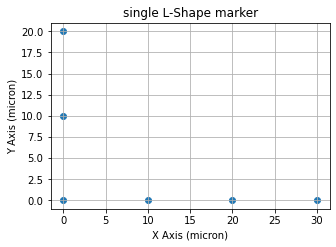

In [58]:
x,y = LShape()
plt.figure(figsize=(5, 5))
plt.scatter(x,y)
plt.xlabel('X Axis (micron)')
plt.ylabel('Y Axis (micron)')
plt.title('single L-Shape marker')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

## Define a marker array with row and column number

In [59]:
def Markers(row, collumn, pitch = 55):
    x=np.array([])
    y=np.array([])
    for i in range(row):
        for j in range(collumn):
            currentx,currenty = LShape()
            currentx += j * pitch
            currenty += i * pitch
            x=np.append(x,currentx)
            y=np.append(y,currenty)
    return x,y

## Plot a marker array with some rwo and column numbers

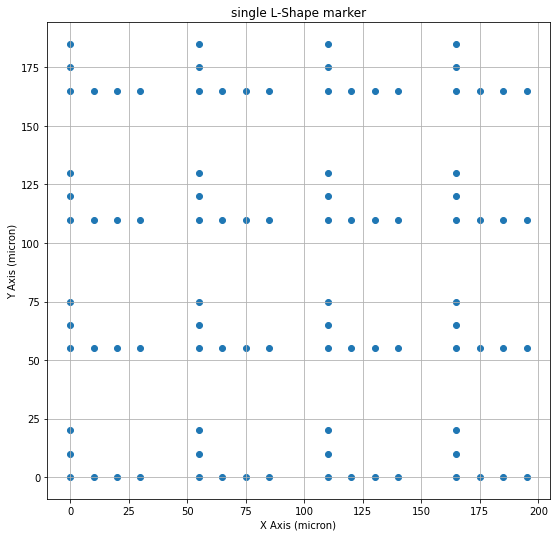

In [60]:
x,y = Markers(4,4)
plt.figure(figsize=(9, 9))
plt.scatter(x,y)
plt.xlabel('X Axis (micron)')
plt.ylabel('Y Axis (micron)')
plt.title('single L-Shape marker')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

## Convert the marker array from length unit to pixel unit

In [61]:
width = 100 # field of view in micron
total_pixel = 2**16 # total number of pixel
x = x / width * total_pixel # convert x
y = y / width * total_pixel # convert y

## Plot the converted marker array

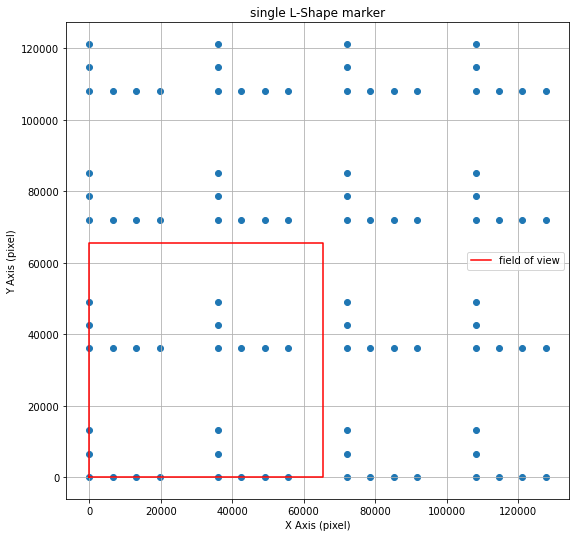

In [62]:
plt.figure(figsize=(9, 9))
plt.scatter(x,y)
plt.plot([0,0,2**16,2**16,0],[0,2**16,2**16,0,0],color = 'r', label = 'field of view')
plt.legend()
plt.xlabel('X Axis (pixel)')
plt.ylabel('Y Axis (pixel)')
plt.title('single L-Shape marker')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

## Calculate depth to time

In [63]:
depth_to_time = 1.1e5 # 100* nanosecond / micron
desired_depth = 1 # micron
z = (x*0+1)*desired_depth * depth_to_time

## Write the .str file

In [65]:
c = np.vstack((z,x,y)).transpose()
s = ''
out_of_bounds = 0
for point in c:
    if not (0<=point[1]<65536 and 0<=point[2]<65536):
        out_of_bounds += 1
    s += '%i %i %i\n'%tuple(point)
if out_of_bounds:
    print('Warning: %i points outside drawing area.'%out_of_bounds)

N = len(x)
rep = 1
filename = 'markerTest.str'

s = ('%i\n'%N) + s # Asher: third line would be total number of points
s = ('%i\n'%rep) + s # Asher: second line would be repetition time
s = 's16\n' + s # Asher: this is the first line of .str file, in our case this is a single 's'

f = open(filename,'w')
f.write(s)
f.close()